In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Kkma, Komoran, Okt, Hannanum #Mecab은 윈도우에서 작동 불가능
from wordcloud import WordCloud
from time import time

from konlpy import tag
from konlpy.corpus import kolaw
# from konlpy.utils import csvwrite, pprint

from nltk.tokenize import sent_tokenize

from collections import Counter


import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv("C:/NLP/Lyrics_v2.csv")
df.head()

,Lyrics,label
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하...,0
1,라라랄라 라라랄라 이어 이어 네가 맛있었다고 했던 살구빛 샐러드 맛있어서 또 먹고 ...,0
2,자꾸 마주치는 네 눈빛에 왠지 어색해 대체 왜 이래 고개를 숙여봐도 너의 발끝에 맘...,0
3,어깨동무까진 괜찮아 그 치마 손잡는 건 조금 위험해 잘 자란 메세 진 괜찮아그래도 ...,0
4,햇살이 가득 그댈 향한 가벼운 발걸음 콧노래 부르며 쇼윈도에 비친 내 모습을 한번 ...,0


In [7]:
df.shape

(200, 2)

In [8]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [9]:
apply_regular_expression(df['Lyrics'][0])

'아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하고 있어 늦은 밤 졸린 눈 비비며 너에게 편지를 쓸게 반가운 사진 속 그 표정만큼 아름다운 나날들이기를 찬 바람이 불어와 어깨가 움츠러들 때에도 너를 떠올린다면 씩씩한 표정 할 수 있어 알고 있니 넌 나의 두근대는 맘은 아직까지 여기에 언제까지나 좋아한단 말은 나를 웃음 짓게 해 때로는 지쳐 울어도 우 우 우 우 눈을 감으니 꼭 곁에 있는 것 같아 짠 하고 나타날 게 생각지 못한 어느 날 우연히 문득 뒤돌아 봤을 때 그때 꼭 내가 서 있을게 꼭 하고 껴안을게 가장 반가운 얼굴로 눈물이 왈칵 쏟아진다 해도 나는 환하게 웃을 거야 혹시 오늘 너에게 서러운 일이 생긴다면 오래전 그날처럼 달려가 꼭 안아주고파아름답게 빛나길 알고 있니 넌 나의 두근대는 맘은 아직까지 여기에 언제까지나 좋아한단 말은 나를 웃음 짓게 해 때로는 지쳐 울어도 눈을 감으니 꼭 곁에 있는 것 같아 기억해줘 넌 나의 보고 싶은 사람 이만 줄일게 안녕 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나는 여전히 너를 사랑하고 있다 나의 번호 나의 번호'

In [23]:
okt = Okt()  # 명사 형태소 추출 함수
print("[OKt nouns 함수]")
print(okt.nouns(str(df['Lyrics'])))


[OKt nouns 함수]
['아침', '너', '인사', '멀리', '나', '널', '생각', '라라', '라라', '네', '살구', '빛', '샐러드', '또', '자꾸', '네', '눈빛', '대체', '왜', '고개', '너', '발끝', '맘', '어깨동무', '그', '치마', '건', '조금', '진', '햇살', '가득', '그', '향', '발걸음', '콧노래', '쇼', '윈도', '내', '모습', '한번', '누구', '손가락질', '때', '가슴', '한편', '이', '걸', '그', '그', '말', '너', '하루', '한숨', '또', '버티고', '소년', '어른', '사람', '알', '때', '뜻', '요구', '입술', '소년', '왜', '한숨', '왜', '고', '못', '나', '내', '발걸음', '오늘', '혼자', '생각', '때', '이유', '눈물', '날', '때', '꿈', '길', '일', '때']


In [25]:
# 말뭉치 생성
corpus = "".join(df['Lyrics'].tolist())
corpus[:50]


'아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하고 있어'

In [26]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['아침', '너', '인사', '멀리', '나', '널', '생각', '밤', '눈', '비비', '너', '편지', '사진', '속', '그', '표정', '나날', '이기', '찬', '바람', '어깨', '때', '너', '표정', '수', '알', '넌', '나', '근대', '맘', '여기', '언제', '말', '웃음', '해', '때로는', '어도', '눈', '꼭', '곁', '것', '게', '생각', '못', '날', '문득', '뒤', '때', '그때', '꼭', '내', '꼭', '가장', '얼굴', '눈물', '왈칵', '해도', '나', '웃', '혹시', '오늘', '너', '그날', '꼭', '알', '넌', '나', '근대', '맘', '여기', '언제', '말', '웃음', '해', '때로는', '어도', '눈', '꼭', '곁', '것', '기억', '넌', '나', '보고', '사람', '안녕', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '너', '사랑', '나', '번호', '나', '번호', '라라', '라라', '네', '살구', '빛', '샐러드', '또', '네', '것', '나', '행복', '달력', '안', '기념일', '나나', '나나', '네', '살구', '빛', '샐러드', '그날', '샐러드', '기념일', '우후', '나나', '나나', '네', '멜로디언', '소리', '그날', '멜로디', '기념일', '라라라', '나나', '네', '조그만', '고양이', '또', '보고', '네', '것', '나', '고양이', '방', '나나', '나나', '네', '살구', '빛', '샐러드', '그날', '샐러드', '기념일', '우후', '나', '나나', '네', '멜로디언', '소리', '그날', '멜로디', '기념일', '라라라', '나나',

In [27]:
# 빈도 탐색
counter = Counter(nouns)
counter.most_common(20)

[('내', 778),
 ('나', 645),
 ('너', 617),
 ('사랑', 476),
 ('말', 331),
 ('난', 315),
 ('날', 314),
 ('것', 303),
 ('네', 287),
 ('그', 282),
 ('수', 238),
 ('우리', 217),
 ('더', 214),
 ('널', 185),
 ('그대', 180),
 ('이', 171),
 ('걸', 152),
 ('오', 146),
 ('게', 144),
 ('해', 138)]

In [29]:
# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(20)


[('사랑', 476),
 ('우리', 217),
 ('그대', 180),
 ('제발', 132),
 ('마음', 128),
 ('아웃', 125),
 ('사람', 121),
 ('생각', 118),
 ('지금', 114),
 ('세상', 107),
 ('이제', 99),
 ('모든', 81),
 ('시간', 80),
 ('순간', 79),
 ('오늘', 76),
 ('기억', 75),
 ('하루', 73),
 ('그냥', 68),
 ('바람', 67),
 ('혼자', 67)]

In [30]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]


[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [31]:
# 추가할 불용어

lyric_stopwords = ['예컨대','하면','아니거든','어찌하든지','같다','비슷하다',
'에게','하고','를','은','는','이','가','하','아','것','들','을','끼',
'의','있','되','수','보','주','등','으로','에','서','로',
'도','에서','있다','하다','와','되다','과','보다','이','있','하','것','들','그',
'되','수','이','보','않','없','나','사람','주','아니','등','같','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두',
'말하','알','그러나','받','못하','일','그런','또','더','많','그리고','좋','크','따르','중','나오',
'가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','안','어떤','내','내','경우','명',
'다시','이런','앞','보이','번','나','다른','어떻','개','전','들','사실','이렇','점','싶','말','정도','좀',
'원','잘','통하','놓','우','이기','며','어도','이만','이기','만큼','들다','에도','랄랄','랄','랄라','라라','워','우','어',
'라라라','나나','우후','휴','후','우우','만','게','아무','없이이','래','래그','엔','선','라라',
'면','딱','까지는','거기','대다','이나','않다','이다','대다','다나','고','다','듯',
'랑','뿐','이야','테','니','에는','해도','거야','에도','거','라고','걸','째','인','죠',
'없다','라이트']
for word in lyric_stopwords:
    stopwords.append(word)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['Lyrics'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
# 각 단어의 가사별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
bow_vect.shape

(200, 2135)

In [ ]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict


{'가게': 4,
 '가격표': 2,
 '가기': 1,
 '가까이': 11,
 '가끔': 19,
 '가능': 1,
 '가도': 10,
 '가득': 18,
 '가든': 4,
 '가라': 2,
 '가로': 1,
 '가로등': 1,
 '가로막': 1,
 '가루': 1,
 '가루약': 2,
 '가면': 13,
 '가뭄': 1,
 '가빠': 1,
 '가사': 3,
 '가슴': 37,
 '가슴속': 5,
 '가시': 2,
 '가식': 1,
 '가십': 1,
 '가야': 19,
 '가요': 6,
 '가운데': 1,
 '가위': 1,
 '가위바위보': 1,
 '가을': 1,
 '가장': 19,
 '가재': 1,
 '가족': 2,
 '가짜': 5,
 '가파른': 1,
 '가해': 1,
 '각자': 2,
 '간다': 12,
 '간단': 1,
 '간식': 1,
 '간장': 1,
 '간직': 6,
 '간판': 4,
 '갈고': 1,
 '갈라': 1,
 '갈피': 2,
 '감각': 2,
 '감고': 7,
 '감당': 4,
 '감사': 4,
 '감자': 1,
 '감정': 5,
 '감정노동': 1,
 '감지': 1,
 '감히': 1,
 '갑부': 1,
 '갑자기': 2,
 '갓길': 1,
 '강남': 1,
 '강물': 2,
 '개도': 3,
 '개성': 1,
 '개월': 2,
 '개코': 1,
 '개판': 1,
 '객석': 1,
 '걔네': 3,
 '거꾸로': 1,
 '거나': 3,
 '거란': 4,
 '거래': 1,
 '거려': 1,
 '거름': 1,
 '거리': 20,
 '거릴': 4,
 '거만': 1,
 '거북이': 3,
 '거슬러': 1,
 '거울': 9,
 '거위': 1,
 '거의': 1,
 '거인병': 1,
 '거절': 3,
 '거지': 10,
 '거짓': 2,
 '거짓말': 12,
 '거짓말쟁이': 1,
 '거치': 1,
 '거품': 1,
 '걱정': 24,
 '걱정거리': 1,
 '건가': 8,
 '건반': 1,
 '건배': 1,
 '걸음': 18,
 '걸이': 2,
 '

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

print(tf_idf_vect.shape)


(200, 2135)


In [ ]:
# 첫 번째 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])


  (0, 2087)	0.05270108773209125
  (0, 1969)	0.11103284207105173
  (0, 1952)	0.06728506928612135
  (0, 1510)	0.07592642246786777
  (0, 1431)	0.10214830934089414
  (0, 1385)	0.08662971162317915
  (0, 1355)	0.040761812527883544
  (0, 1306)	0.09288012988371736
  (0, 1288)	0.05107415467044707
  (0, 1287)	0.09783201830169277
  (0, 1252)	0.056581780130809986
  (0, 1212)	0.060305703851188656
  (0, 1197)	0.05358370407699754
  (0, 992)	0.0692666726426429
  (0, 957)	0.07248073298106983
  (0, 942)	0.02750943084022364
  (0, 910)	0.07592642246786777
  (0, 833)	0.045878490975498606
  (0, 811)	0.9111170696144132
  (0, 746)	0.04199779857677988
  (0, 712)	0.06728506928612135
  (0, 638)	0.05032075734057741
  (0, 513)	0.15185284493573553
  (0, 366)	0.045878490975498606
  (0, 275)	0.0696653996776352
  (0, 235)	0.0378806301601158
  (0, 215)	0.16073737766589313
  (0, 205)	0.05896211052232382
  (0, 194)	0.05107415467044707
  (0, 30)	0.05896211052232382


In [ ]:
vect.vocabulary_

{'아침': 1197,
 '인사': 1510,
 '멀리': 638,
 '생각': 992,
 '비비': 910,
 '편지': 1952,
 '사진': 957,
 '표정': 1969,
 '나날': 275,
 '바람': 746,
 '어깨': 1252,
 '근대': 215,
 '여기': 1306,
 '언제': 1287,
 '웃음': 1431,
 '때로는': 513,
 '문득': 712,
 '그때': 205,
 '가장': 30,
 '얼굴': 1288,
 '눈물': 366,
 '왈칵': 1385,
 '혹시': 2087,
 '오늘': 1355,
 '그날': 194,
 '기억': 235,
 '보고': 833,
 '안녕': 1212,
 '번호': 811,
 '사랑': 942,
 '살구': 965,
 '샐러드': 991,
 '행복': 2060,
 '달력': 402,
 '기념일': 225,
 '멜로디언': 651,
 '소리': 1040,
 '멜로디': 650,
 '조그만': 1663,
 '고양이': 133,
 '자꾸': 1557,
 '눈빛': 367,
 '대체': 436,
 '고개': 122,
 '발끝': 775,
 '내게로': 317,
 '걸음': 94,
 '살짝': 972,
 '혼자': 2088,
 '아주': 1196,
 '동화': 482,
 '순간': 1088,
 '기도': 228,
 '머릿속': 632,
 '괜스레': 164,
 '장난': 1596,
 '스레': 1102,
 '서면': 1004,
 '점점': 1638,
 '심장': 1154,
 '발걸음': 773,
 '어쩌면': 1277,
 '가까이': 3,
 '먼저': 636,
 '갑자기': 56,
 '어쩐지': 1279,
 '하늘': 2000,
 '마음': 580,
 '따라서': 508,
 '간직': 41,
 '가슴속': 20,
 '비밀': 908,
 '어깨동무': 1253,
 '치마': 1825,
 '조금': 1664,
 '연락': 1329,
 '커피': 1850,
 '시간': 1118,
 '가끔': 4,
 '전화': 

In [ ]:
#벡터화
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{1197: '아침', 1510: '인사', 638: '멀리', 992: '생각', 910: '비비', 1952: '편지', 957: '사진', 1969: '표정', 275: '나...


In [ ]:
# 행복, 희망 => 1(긍정), 슬픔, 분노 => 0(부정) 으로 이진분류

def rating_to_label(label):
    if label == 0 or label == 3:
        return 1
    else:
        return 0
    
df['y'] = df['label'].apply(lambda x: rating_to_label(x))



In [ ]:
df.head()

,Lyrics,label,y
0,아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하...,0,1
1,라라랄라 라라랄라 이어 이어 네가 맛있었다고 했던 살구빛 샐러드 맛있어서 또 먹고 ...,0,1
2,자꾸 마주치는 네 눈빛에 왠지 어색해 대체 왜 이래 고개를 숙여봐도 너의 발끝에 맘...,0,1
3,어깨동무까진 괜찮아 그 치마 손잡는 건 조금 위험해 잘 자란 메세 진 괜찮아그래도 ...,0,1
4,햇살이 가득 그댈 향한 가벼운 발걸음 콧노래 부르며 쇼윈도에 비친 내 모습을 한번 ...,0,1


In [ ]:
df["y"].value_counts()

1    100
0    100
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=111)


In [ ]:
x_train.shape, y_train.shape

((160, 2135), (160,))

In [ ]:
x_test.shape, y_test.shape

((40, 2135), (40,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [ ]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.75
precision: 0.70
recall: 0.78
F1: 0.74


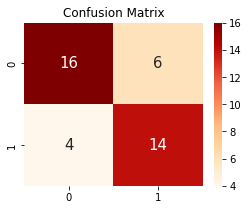

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 긍정, 부정 top 20
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer[:10]


{1197: '아침',
 1510: '인사',
 638: '멀리',
 992: '생각',
 910: '비비',
 1952: '편지',
 957: '사진',
 1969: '표정',
 275: '나날',
 746: '바람',
 1252: '어깨',
 215: '근대',
 1306: '여기',
 1287: '언제',
 1431: '웃음',
 513: '때로는',
 712: '문득',
 205: '그때',
 30: '가장',
 1288: '얼굴',
 366: '눈물',
 1385: '왈칵',
 2087: '혹시',
 1355: '오늘',
 194: '그날',
 235: '기억',
 833: '보고',
 1212: '안녕',
 811: '번호',
 942: '사랑',
 965: '살구',
 991: '샐러드',
 2060: '행복',
 402: '달력',
 225: '기념일',
 651: '멜로디언',
 1040: '소리',
 650: '멜로디',
 1663: '조그만',
 133: '고양이',
 1557: '자꾸',
 367: '눈빛',
 436: '대체',
 122: '고개',
 775: '발끝',
 317: '내게로',
 94: '걸음',
 972: '살짝',
 2088: '혼자',
 1196: '아주',
 482: '동화',
 1088: '순간',
 228: '기도',
 632: '머릿속',
 164: '괜스레',
 1596: '장난',
 1102: '스레',
 1004: '서면',
 1638: '점점',
 1154: '심장',
 773: '발걸음',
 1277: '어쩌면',
 3: '가까이',
 636: '먼저',
 56: '갑자기',
 1279: '어쩐지',
 2000: '하늘',
 580: '마음',
 508: '따라서',
 41: '간직',
 20: '가슴속',
 908: '비밀',
 1253: '어깨동무',
 1825: '치마',
 1664: '조금',
 1329: '연락',
 1850: '커피',
 1118: '시간',
 4: '가끔',
 1628: 

In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

#긍정 가사

for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

기분 0.7325397897028321
제발 0.7009963362848828
그냥 0.5103354773851556
아기 0.4982855130465344
느낌 0.4728743200064909
바로 0.45058788646198183
소리 0.4449596400023766
남자 0.4439893759228468
대로 0.4336288883723618
얼굴 0.4254915973319201
자꾸 0.4187206700108324
엄마 0.41389309232966487
이건 0.39878615828714137
주문 0.3768037555278845
무슨 0.36356987833794335
정말 0.3624535124483804
아웃 0.339449047871262
야야 0.3370652939377673
그녀 0.32686060442228926
스파 0.31348756530060945


In [ ]:
# 부정 가사

for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])


그대 -1.2502324604639532
하늘 -0.9078026382577542
어디 -0.860442513036401
하루 -0.774077432072424
바람 -0.7248818833317318
눈물 -0.719618463325816
위해 -0.7181497567445779
혼자 -0.6674588754434008
마음 -0.5892336891689465
우리 -0.5815389262201928
위로 -0.5477559222376807
안녕 -0.5472390289403541
기억 -0.4868038267238764
어둠 -0.4782886595160947
시작 -0.47043847391677446
하루하루 -0.4663757498227547
잠시 -0.4596355537473321
걸음 -0.45839251628613575
내일 -0.4338903481370613
모든 -0.42996416005477905
